# Project Fandango Website Data Analysis
---
----

## Part One: Understanding the Background and Data


**Read this article for Better Understanding the Concept: [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)**

----

### The Data

This is the data behind the story [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) openly available on 538's github: https://github.com/fivethirtyeight/data. There are two csv files, one with Fandango Stars and Displayed Ratings, and the other with aggregate data for movie ratings from other sites, like Metacritic,IMDB, and Rotten Tomatoes.

#### all_sites_scores.csv

-----

`all_sites_scores.csv` contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

----
----

#### fandango_scape.csv

`fandango_scrape.csv` contains every film 538 pulled from Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

----

*Import the essentials!*

In [260]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn package for data normalization
from sklearn import preprocessing

## Part Two: Exploring Fandango Displayed Scores versus True User Ratings

Let's first explore the Fandango ratings to see if our analysis agrees with the article's conclusion.

In [2]:
fandango = pd.read_csv("fandango_scrape.csv")

In [4]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [6]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [16]:
print(fandango.describe().transpose())

        count         mean          std  min  25%   50%     75%      max
STARS   504.0     3.558532     1.563133  0.0  3.5   4.0    4.50      5.0
RATING  504.0     3.375794     1.491223  0.0  3.1   3.8    4.30      5.0
VOTES   504.0  1147.863095  3830.583136  0.0  3.0  18.5  189.75  34846.0


In [15]:
# lets print the quartiles
Q3, Q1 = np.percentile(fandango['RATING'], [75, 25])
print(f"The lower (25) quartile is of rating {Q1} and the upper (75) quartile is of rating {Q3}", "\n")

The lower (25) quartile is of rating 3.1 and the upper (75) quartile is of rating 4.3 



**Let's explore the relationship between popularity of a film and its rating.**

In [19]:
# find the correlation of rating with votes 
print(fandango.corr()['RATING'])

# NOTES:
"""
IT SEEMS THERE IS NO (OR MINIMUM) CORRELATION BETWEEN RATING AND VOTES 
"""

STARS     0.994696
RATING    1.000000
VOTES     0.163764
Name: RATING, dtype: float64


<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

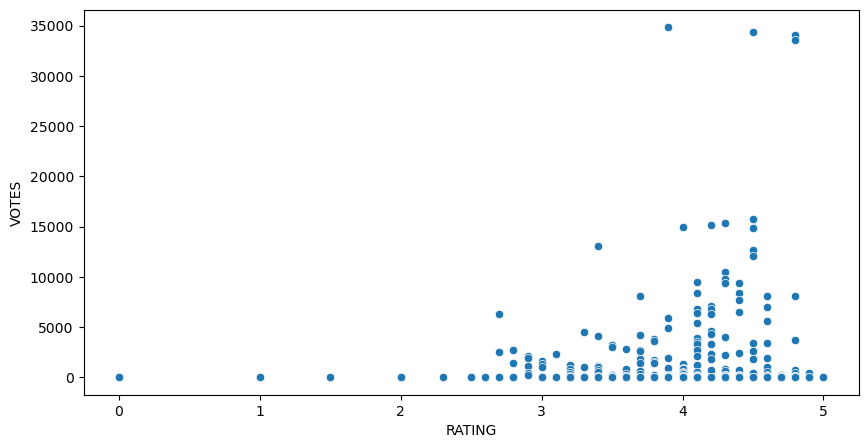

In [22]:
# LETS CREATE A SIMPLE SCATTERPLOT TO COMPREHEND IT
plt.figure(figsize=(10, 5), dpi=100)
sns.scatterplot(data=fandango, x = 'RATING', y='VOTES')

**Assuming that every row in the FILM title column has the same format:**

    Film Title Name (Year)
    
**Let's Create a new column that is able to strip the year from the title strings and set this new column as YEAR**

In [113]:
# lets break the FILM column into its sentences with .apply and create a new column that extracts the year info
fandango['YEAR'] = fandango['FILM'].apply(lambda title: title.split()[-1])
fandango['YEAR']

0      (2015)
1      (2015)
2      (2015)
3      (2015)
4      (2015)
        ...  
499    (2015)
500    (2015)
501    (2015)
502    (1964)
503    (2012)
Name: YEAR, Length: 504, dtype: object

In [127]:
# replace the parenthesis with whitespace 
fandango['YEAR'] = fandango['YEAR'].str.replace('(', " ")
fandango['YEAR'] = fandango['YEAR'].str.replace(')', " ")
fandango['YEAR']

0       2015 
1       2015 
2       2015 
3       2015 
4       2015 
        ...  
499     2015 
500     2015 
501     2015 
502     1964 
503     2012 
Name: YEAR, Length: 504, dtype: object

**The number of movies that are in the Fandango DataFrame per year**

In [128]:
fandango['YEAR'].value_counts()

 2015     478
 2014      23
 2016       1
 1964       1
 2012       1
Name: YEAR, dtype: int64

**The count of movies per year with a plot:**

<AxesSubplot:xlabel='YEAR', ylabel='count'>

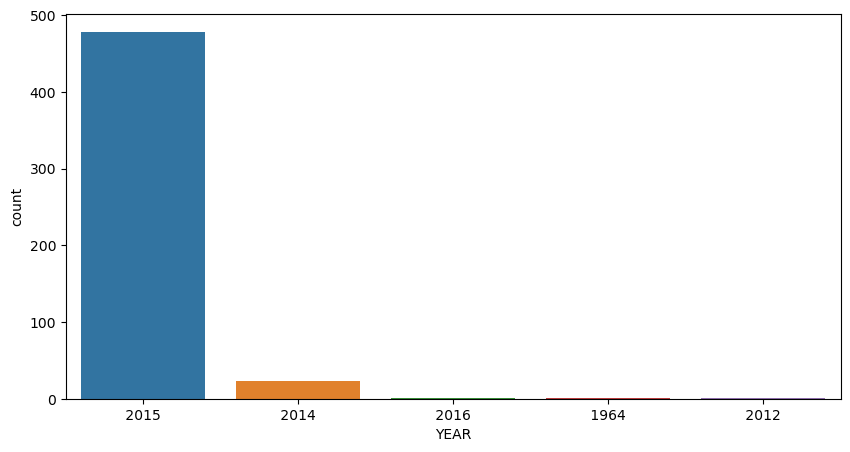

In [131]:
plt.figure(figsize=(10, 5), dpi=100)
sns.countplot(data=fandango, x = 'YEAR')

**Let's find the 10 movies with the highest number of votes**

In [134]:
fandango.nlargest(10, 'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


**The number of movies that have zero votes**

In [142]:
num_of_zero_vote_movies = fandango[fandango['VOTES'] == 0]
len(num_of_zero_vote_movies)

69

**Let's Create a DataFrame of only reviewed films by removing any films that have zero votes.**

In [149]:
reviewed_only = fandango.drop(num_of_zero_vote_movies.index, axis=0)
reviewed_only # expected 504-69 = 435 rows 

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


----

**As noted in the article, due to HTML and star rating displays, the true user rating may be slightly different than the rating shown to a user. Let's visualize this difference in distributions.**

**By Creating kdeplots that display the distribution of ratings that are displayed (STARS) versus what the true rating was from votes (RATING).**

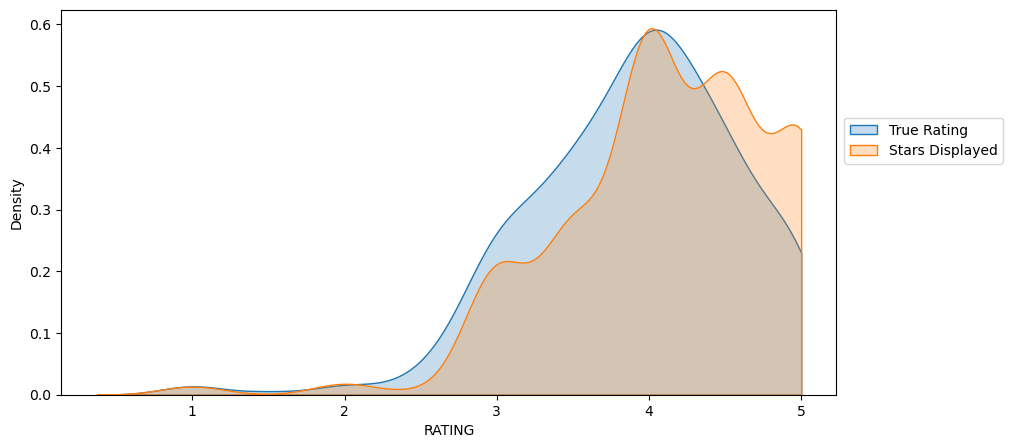

In [178]:
plt.figure(figsize = (10, 5), dpi=100)

# create the kdeplots and label them 
kde_rating = sns.kdeplot(data=reviewed_only, x='RATING', clip = [0, 5], shade=True, label = 'True Rating') 
kde_stars = sns.kdeplot(data=reviewed_only, x='STARS', clip = [0, 5], shade=True, label='Stars Displayed')

# locate the legend
plt.legend(loc = (1.01, 0.6))

**Let's now actually quantify this discrepancy with a new column of the difference between STARS displayed versus true RATING.**

In [182]:
reviewed_only['STARS DIFF'] = round(abs(reviewed_only['STARS'] - reviewed_only['RATING']), 2)                            
reviewed_only['STARS DIFF']

0      0.1
1      0.0
2      0.2
3      0.2
4      0.0
      ... 
430    0.0
431    0.0
432    0.0
433    0.0
434    0.0
Name: STARS DIFF, Length: 435, dtype: float64

In [183]:
reviewed_only.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0


**Countplot to display the number of times a certain difference occurs.**

<AxesSubplot:xlabel='STARS DIFF', ylabel='count'>

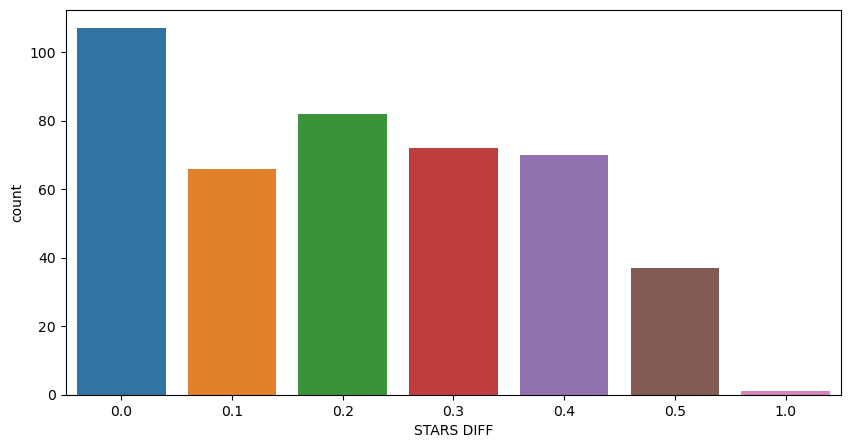

In [190]:
plt.figure(figsize = (10, 5), dpi = 100)
sns.countplot(data=reviewed_only, x = 'STARS DIFF')

**Let's find the movie that has close to 1 star differential**

In [192]:
reviewed_only[reviewed_only['STARS DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Part Three: Comparison of Fandango Ratings to Other Sites

Let's now compare the scores from Fandango to other movies sites and see how they compare.

In [193]:
all_sites = pd.read_csv("all_sites_scores.csv")

In [235]:
print(f'all_sites_scores consists of {len(all_sites)} rows !')

all_sites_scores consists of 146 rows !


In [196]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [195]:
all_sites.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RottenTomatoes,146.0,60.849315,30.168799,5.0,31.25,63.50,89.00,100.0
RottenTomatoes_User,146.0,63.876712,20.024430,20.0,50.00,66.50,81.00,94.0
Metacritic,146.0,58.808219,19.517389,13.0,43.50,59.00,75.00,94.0
Metacritic_User,146.0,6.519178,1.510712,2.4,5.70,6.85,7.50,9.6
IMDB,146.0,6.736986,0.958736,4.0,6.30,6.90,7.40,8.6
Metacritic_user_vote_count,146.0,185.705479,316.606515,4.0,33.25,72.50,168.50,2375.0
IMDB_user_vote_count,146.0,42846.205479,67406.509171,243.0,5627.00,19103.00,45185.75,334164.0


### Rotten Tomatoes

Let's first take a look at Rotten Tomatoes. RT has two sets of reviews, their critics reviews (ratings published by official critics) and user reviews. 

In [206]:
# find the correlation between the critics and user ratings in RottenTomatoes
print(all_sites.corr()['RottenTomatoes']['RottenTomatoes_User'])

# NOTES
"""
Correlated a little above 78 %
"""

0.781439628201966


'\nCorrelated a little above 78 %\n'

**A scatterplot to explore the relationship between RT Critic reviews and RT User reviews.**

<AxesSubplot:xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

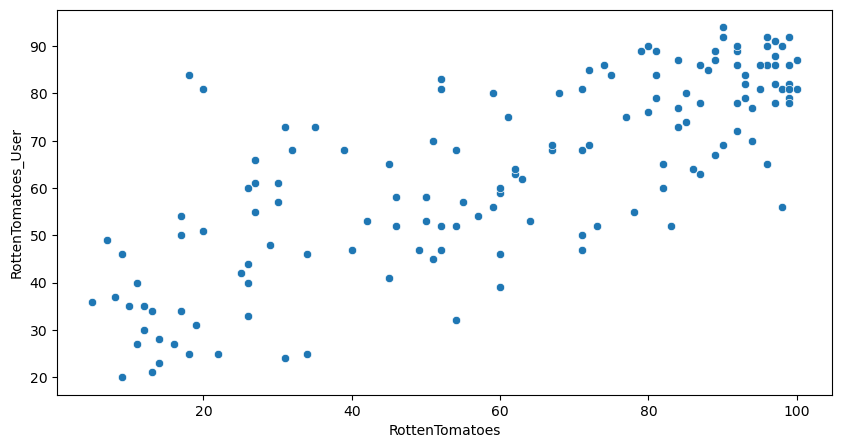

In [205]:
# lets scatterplot it to make it clear
plt.figure(figsize=(10, 5), dpi=100) 
sns.scatterplot(data = all_sites, x = 'RottenTomatoes', y = 'RottenTomatoes_User')

Let's quantify this difference by comparing the critics ratings and the RT User ratings. We will calculate this with RottenTomatoes-RottenTomatoes_User. Note: Rotten_Diff here is Critics - User Score. So values closer to 0 means aggrement between Critics and Users. Larger positive values means critics rated much higher than users. Larger negative values means users rated much higher than critics.

**Let's Create a new column based off the difference between critics ratings and users ratings for Rotten Tomatoes.**

In [227]:
all_sites['RT_DIFF_USER_AND_CRITICS'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_DIFF_USER_AND_CRITICS
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


Let's now compare the overall mean difference. Since we're dealing with differences that could be negative or positive, first take the absolute value of all the differences, then take the mean. This would report back on average to absolute difference between the critics rating versus the user rating.

In [211]:
all_sites['RT_DIFF_USER_AND_CRITICS'].apply(abs).mean()

15.095890410958905

**Let's Plot the distribution of the differences between RT Critics Score and RT User Score.**

Text(0.5, 1.0, 'RT Critics Score Minus RT User Score')

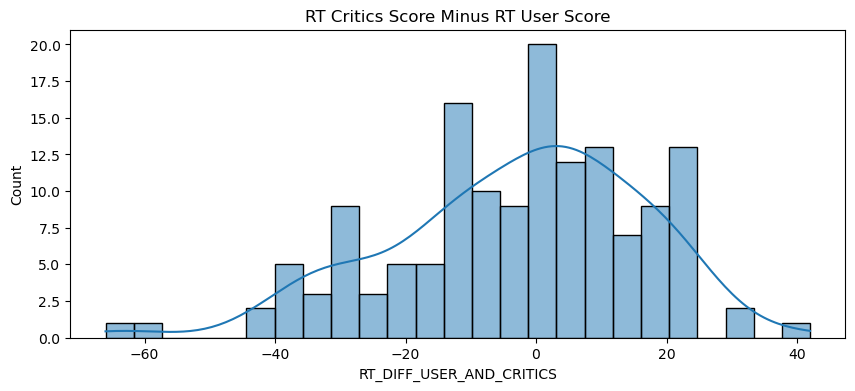

In [219]:
# displot with kde
plt.figure(figsize = (10, 4), dpi=100)
sns.histplot(data=all_sites, x = 'RT_DIFF_USER_AND_CRITICS', kde = True, bins = 25)
plt.title('RT Critics Score Minus RT User Score')

**Now a distribution showing the *absolute value* difference between Critics and Users on Rotten Tomatoes.**

Text(0.5, 1.0, 'Absolute Difference Between RT Critics Score Minus RT User Score')

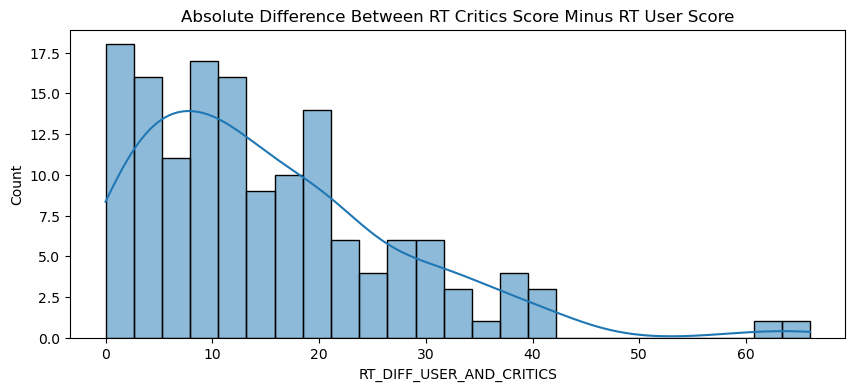

In [221]:
# displot with kde
plt.figure(figsize = (10, 4), dpi=100)
sns.histplot(data=all_sites, x = abs(all_sites['RT_DIFF_USER_AND_CRITICS']), kde = True, bins = 25)
plt.title('Absolute Difference Between RT Critics Score Minus RT User Score')

**Let's find out which movies are causing the largest differences.**

**The top 5 movies users rated higher than critics on average:**

In [236]:
# 5 largest (in this case smallest since we want the negative values) by user ratings
print('Top 5 Films that Users love but Critics hate : ', )
all_sites[['FILM', 'RT_DIFF_USER_AND_CRITICS']].nsmallest(5, 'RT_DIFF_USER_AND_CRITICS')

Top 5 Films that Users love but Critics hate : 


,FILM,RT_DIFF_USER_AND_CRITICS
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


**The top 5 movies critics scored higher than users on average:**

In [237]:
# 5 largest by user ratings
print('Top 5 Films that Critics love but Users hate : ', )
all_sites[['FILM', 'RT_DIFF_USER_AND_CRITICS']].nlargest(5, 'RT_DIFF_USER_AND_CRITICS')

Top 5 Films that Critics love but Users hate : 


,FILM,RT_DIFF_USER_AND_CRITICS
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


## MetaCritic

Now let's take a quick look at the ratings from MetaCritic. Metacritic also shows an average user rating versus their official displayed rating.

In [242]:
# find the correlation between the critics and user ratings in Metacritic
print(all_sites.corr()['Metacritic']['Metacritic_User'])

# NOTES
"""
Correlated a little above 72 %
"""

0.7234587030590373


'\nCorrelated a little above 72 %\n'

**A scatterplot of the Metacritic Rating versus the Metacritic User rating.**

<AxesSubplot:xlabel='Metacritic', ylabel='Metacritic_User'>

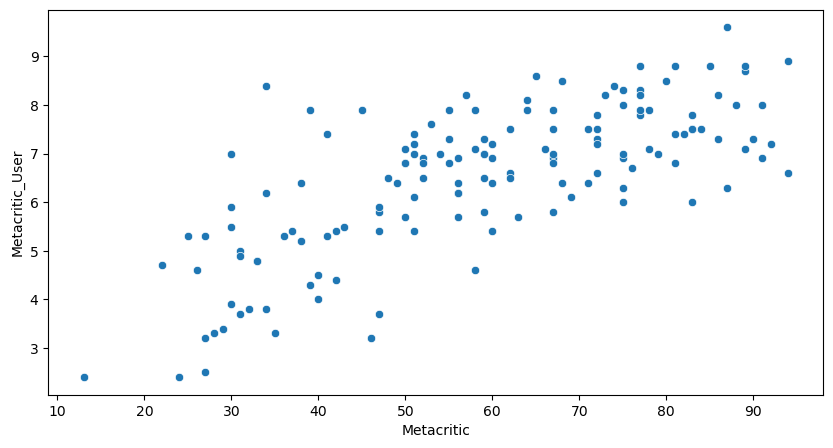

In [243]:
# lets scatterplot it to make it clear
plt.figure(figsize=(10, 5), dpi=100) 
sns.scatterplot(data = all_sites, x = 'Metacritic', y = 'Metacritic_User')

## IMDB

Finally let's explore IMDB. Notice that both Metacritic and IMDB report back vote counts. Let's analyze the most popular movies.

In [246]:
# find the correlation between the critics and user ratings in Metacritic
print(all_sites.corr()['Metacritic_user_vote_count']['IMDB_user_vote_count'])

# NOTES
"""
Correlated 88 %
"""

0.8806353173613833


'\nCorrelated 88 %\n'

**A scatterplot for the relationship between vote counts on MetaCritic versus vote counts on IMDB.**

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

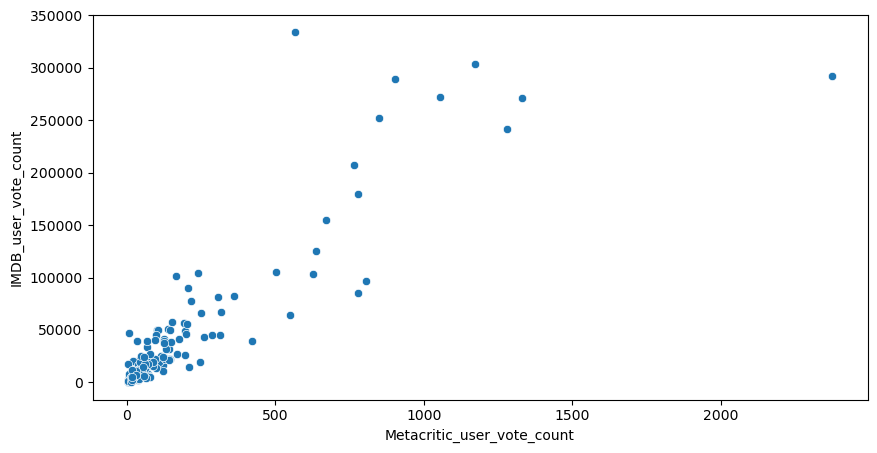

In [247]:
# lets scatterplot it to make it clear
plt.figure(figsize=(10, 5), dpi=100) 
sns.scatterplot(data = all_sites, x = 'Metacritic_user_vote_count', y = 'IMDB_user_vote_count')

**There are 2 outliers here!!!!**

1. The movie with the highest vote count on IMDB only has a little above 500 Metacritic ratings....

In [255]:
all_sites[(all_sites['Metacritic_user_vote_count'].between(500, 600)) & (all_sites['IMDB_user_vote_count'] > 300000)]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_DIFF_USER_AND_CRITICS
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


2. The movie with the highest Metacritic User Vote count....

In [256]:
all_sites.nlargest(1, 'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_DIFF_USER_AND_CRITICS
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


## Fandago Scores vs. All Sites

Finally let's begin to explore whether or not Fandango artificially displays higher ratings than warranted to boost ticket sales.

**Let's Combine the Fandango Table with the All Sites table. Not every movie in the Fandango table is in the All Sites table, since some Fandango movies have very little or no reviews.**

In [258]:
df = pd.merge(left=fandango, right=all_sites, how='inner', on='FILM')
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_DIFF_USER_AND_CRITICS
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  RT_DIFF_USER_AND_CRITICS    145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


### Normalize columns to Fandango STARS and RATINGS 0-5 

RT,Metacritic, and IMDB don't use a score between 0-5 stars like Fandango does. In order to do a fair comparison, we need to *normalize* these values so they all fall between 0-5 stars and the relationship between reviews stays the same.

A simple way to convert ratings:
* 100/20 = 5 
* 10/2 = 5

In order to add the normalized columns inside the original dataframe 

In [286]:
# Dont run this cell multiple times, otherwise you keep dividing!
df['RT_Norm'] = np.round(df['RottenTomatoes']/20,1)
df['RTU_Norm'] =  np.round(df['RottenTomatoes_User']/20,1)

In [287]:
# Dont run this cell multiple times, otherwise you keep dividing!
df['Meta_Norm'] =  np.round(df['Metacritic']/20,1)
df['Meta_U_Norm'] =  np.round(df['Metacritic_User']/2,1)

In [288]:
# Dont run this cell multiple times, otherwise you keep dividing!
df['IMDB_Norm'] = np.round(df['IMDB']/2,1)

In [289]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_DIFF_USER_AND_CRITICS,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


**So lets create a brand new dataframe that has only the numeric columns normalized**

First Way = With Sklearn

In [293]:
x = df[['STARS', 'RATING', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB']].values # mind the values here !!!

# create an object of MinMaxScaler()
min_max_scaler = preprocessing.MinMaxScaler()

# transform the data
x_scaled = min_max_scaler.fit_transform(x)

# create a new normalized dataframe and name it's columns
df_norm = pd.DataFrame(x_scaled)
df_norm.columns = ['STARS_NORM', 'RATING_NORM', 'RottenTomatoes_NORM', 'RottenTomatoes_User_NORM', 'Metacritic_NORM', 'Metacritic_User_NORM', 'IMDB_NORM']
df_norm

,STARS_NORM,RATING_NORM,RottenTomatoes_NORM,RottenTomatoes_User_NORM,Metacritic_NORM,Metacritic_User_NORM,IMDB_NORM
0,0.50,0.571429,0.210526,0.297297,0.407407,0.111111,0.043478
1,0.75,0.857143,0.694737,0.824324,0.567901,0.638889,0.717391
2,1.00,1.000000,0.705263,0.878378,0.728395,0.583333,0.739130
3,1.00,1.000000,0.800000,0.864865,0.666667,0.611111,0.739130
4,0.75,0.857143,0.978947,0.945946,1.000000,0.902778,1.000000
...,...,...,...,...,...,...,...
140,0.25,0.380952,0.863158,0.581081,0.679012,0.555556,0.586957
141,0.50,0.428571,0.947368,0.824324,0.913580,0.541667,0.652174
142,0.75,0.714286,0.926316,0.864865,0.666667,0.638889,0.826087
143,0.50,0.571429,0.947368,0.891892,0.901235,0.680556,0.739130


Second Way = Just add the columns

In [295]:
norm_scores = df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm']]
norm_scores

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...
140,3.5,3.5,4.4,3.2,3.4,3.2,3.4
141,4.0,3.6,4.8,4.0,4.4,3.2,3.5
142,4.5,4.2,4.6,4.2,3.4,3.5,3.9
143,4.0,3.9,4.8,4.3,4.3,3.6,3.7


### Comparing Distribution of Scores Across Sites


Now the moment of truth! Does Fandango display abnormally high ratings? We already know it pushes displayed RATING higher than STARS, but are the ratings themselves higher than average?


*Plot comparing the distributions of normalized ratings across all sites.**

In [290]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

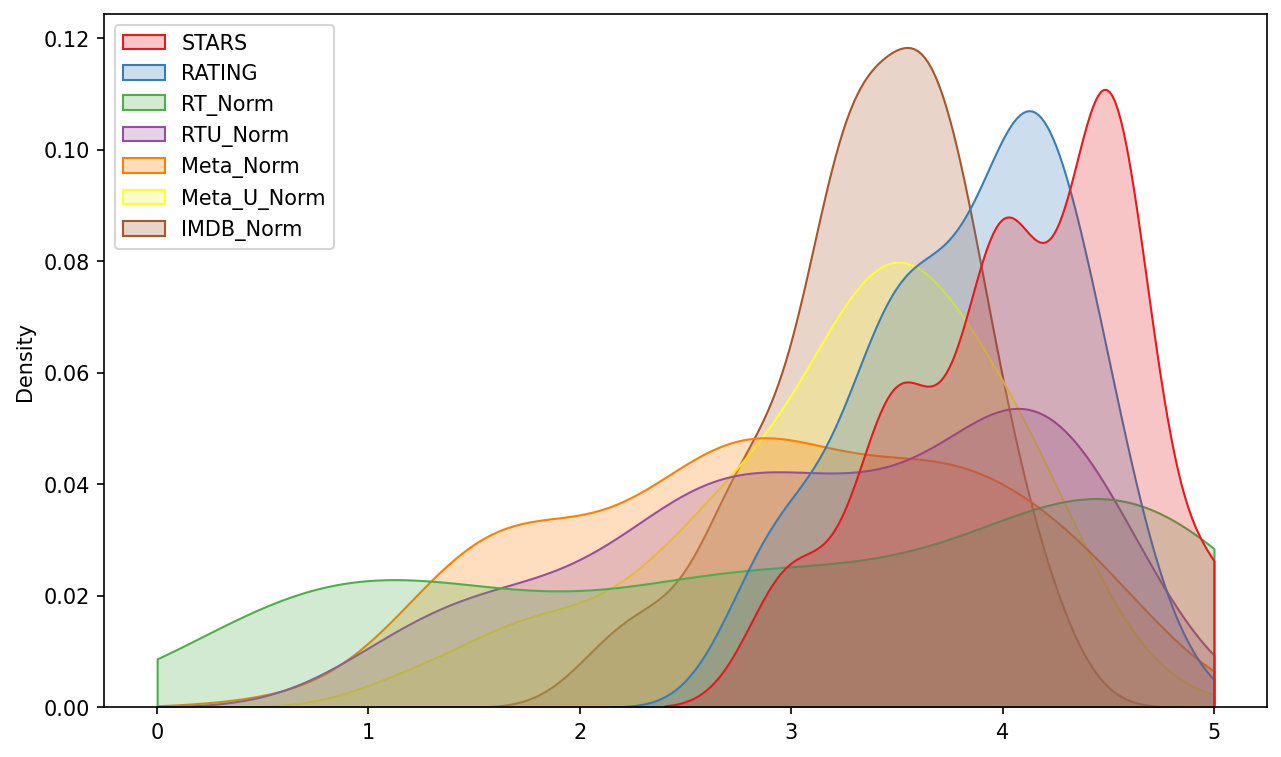

In [297]:
fig, ax = plt.subplots(figsize=(10,6),dpi=150)
sns.kdeplot(data=norm_scores,clip=[0,5],shade=True,palette='Set1',ax=ax)
move_legend(ax, "upper left")

**Clearly Fandango has an uneven distribution. We can also see that RT critics have the most uniform distribution. Let's directly compare these two.** 

**Let's Create a KDE plot that compares the distribution of RT critic ratings against the STARS displayed by Fandango.**

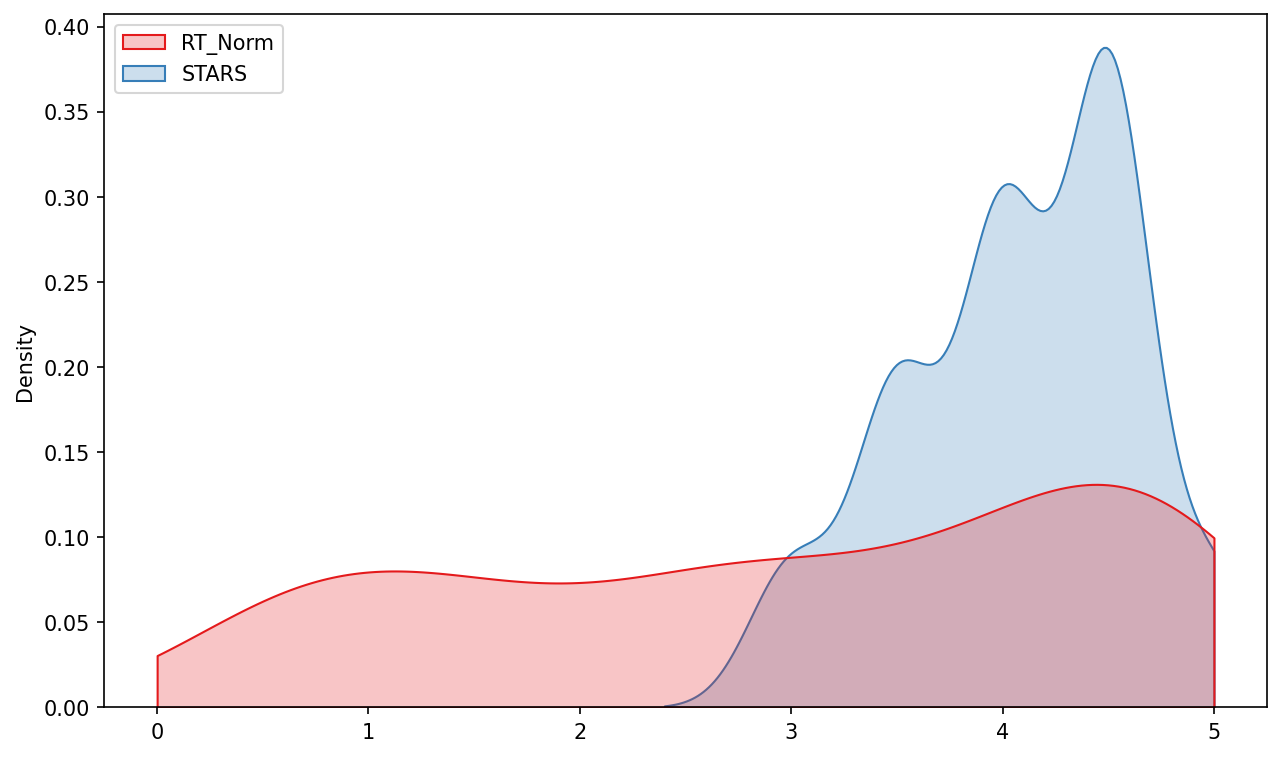

In [298]:
fig, ax = plt.subplots(figsize=(10,6),dpi=150)
sns.kdeplot(data=norm_scores[['RT_Norm', 'STARS']],clip=[0,5],shade=True,palette='Set1',ax=ax)
move_legend(ax, "upper left")

**Clearly Fandango is rating movies much higher than other sites, especially considering that it is then displaying a rounded up version of the rating. Let's examine the top 10 worst movies. Based off the Rotten Tomatoes Critic Ratings, what are the top 10 lowest rated movies? What are the normalized scores across all platforms for these movies?**

In [318]:
# add the column film to norm_scores
norm_scores = df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm', 'FILM']] 

# NOW FIND THE ROWS
top_10_worst_movies = norm_scores.nsmallest(10, 'RT_Norm')
top_10_worst_movies

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)


**Lets Visualize the distribution of ratings across all sites for the top 10 worst movies.**

Text(0.5, 1.0, "Ratings for RT Critic's 10 Worst Reviewed Films")

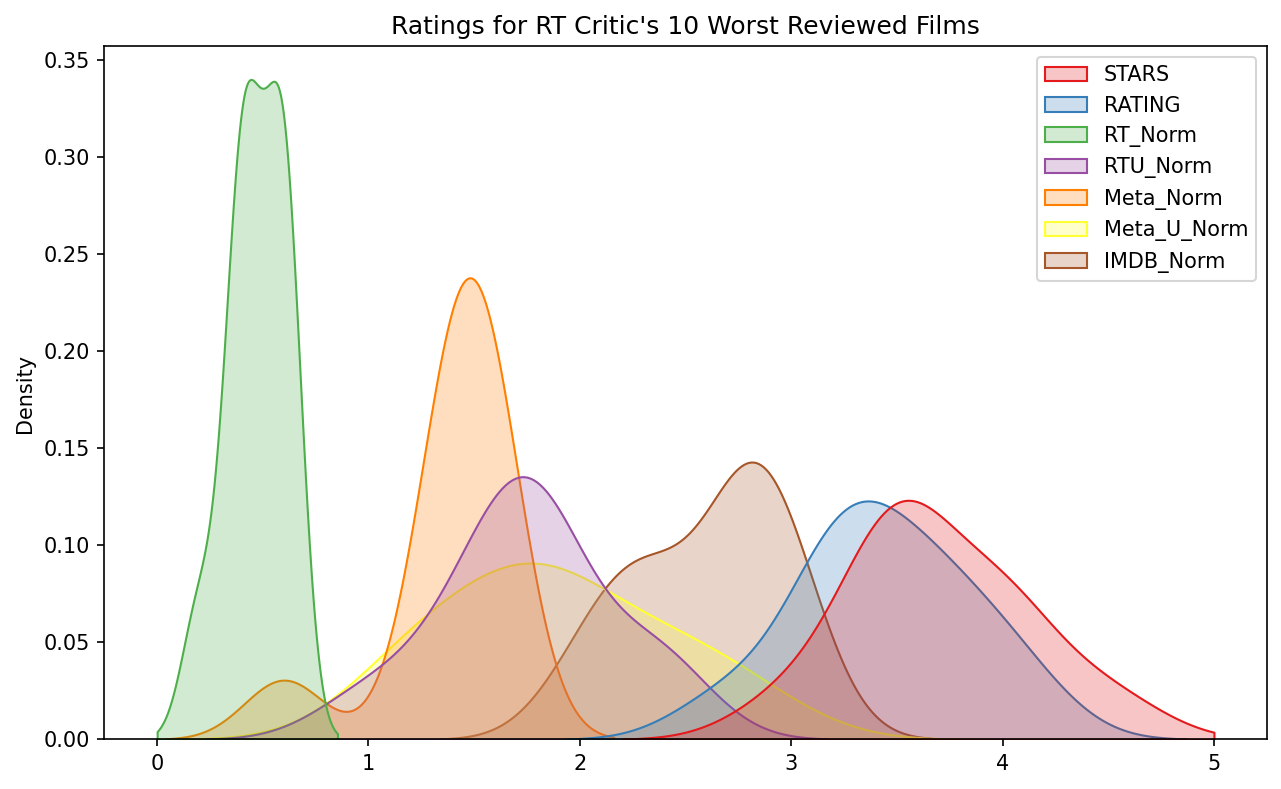

In [317]:
fig, ax = plt.subplots(figsize=(10,6),dpi=150)
sns.kdeplot(data=top_10_worst_movies.drop('FILM', axis=1),clip=[0,5],shade=True,palette='Set1',ax=ax)
move_legend(ax, "upper right")
plt.title("Ratings for RT Critic's 10 Worst Reviewed Films")

---
----

<img src="https://static.wikia.nocookie.net/hitman/images/f/f1/Hitman_Agent_47_Poster_003.jpg/revision/latest?cb=20220923010142" width="500" height="700">

**Final thoughts: Fandango is showing 4 star ratings for films that are bad!**

In [328]:
top_10_worst_movies[top_10_worst_movies['FILM'] == 'Hitman: Agent 47 (2015)']

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)


----